In [210]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt


## Exercise 1

In [211]:
df = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5]
})
df

,x,y
0,2,1
1,3,2
2,1,2
3,1,1
4,0,1
5,5,3
6,4,3
7,6,7
8,5,6
9,3,5


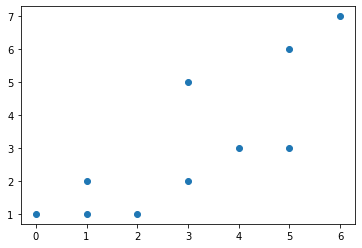

In [212]:
plt.scatter(df.x, df.y)

In [213]:
df['2x+1'] = df['x']*2+1
df1 = df.copy()
df1['diff'] = df.y - df['2x+1']
df1['diff_square'] = df1['diff']**2
mse = sum(df1.diff_square)/len(df1.x)
print(mse)
df1

21.1


,x,y,2x+1,diff,diff_square
0,2,1,5,-4,16
1,3,2,7,-5,25
2,1,2,3,-1,1
3,1,1,3,-2,4
4,0,1,1,0,0
5,5,3,11,-8,64
6,4,3,9,-6,36
7,6,7,13,-6,36
8,5,6,11,-5,25
9,3,5,7,-2,4


In [215]:
def mse(actual, predicted):
    mean_squared_error = ((actual - predicted)**2).sum()/len(df.x)
    return mean_squared_error

print(mse(df.y, df['2x+1']))

21.1


In [216]:
print(mse(df.y, df.x))

1.5


In [217]:
df['2x-1'] = df['x']*2-1
df
print(mse(df.y, df['2x-1']))

9.5


In [218]:
df['x-0.5'] = df['x']-0.5
df
print(mse(df.y, df['x-0.5']))

1.85


In [219]:
df['x+0.5'] = df['x']+0.5
df
print(mse(df.y, df['x+0.5']))

1.65


f(x) = x has the lowest mean squared error 

In [220]:
mses = pd.DataFrame({
    'values': [21.2, 1.5, 9.5, 1.85, 1.65]
}, index=['2x+1', 'x', '2x-1', 'x-0.5', 'x+0.5'])
mses

,values
2x+1,21.20
x,1.50
2x-1,9.50
x-0.5,1.85
x+0.5,1.65


In [221]:
df

,x,y,2x+1,2x-1,x-0.5,x+0.5
0,2,1,5,3,1.5,2.5
1,3,2,7,5,2.5,3.5
2,1,2,3,1,0.5,1.5
3,1,1,3,1,0.5,1.5
4,0,1,1,-1,-0.5,0.5
5,5,3,11,9,4.5,5.5
6,4,3,9,7,3.5,4.5
7,6,7,13,11,5.5,6.5
8,5,6,11,9,4.5,5.5
9,3,5,7,5,2.5,3.5


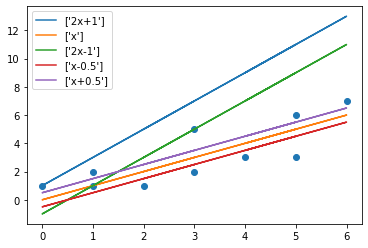

In [222]:
plt.scatter(df.x, df.y)
plt.plot(df.x, df['2x+1'], label=['2x+1'])
plt.plot(df.x, df.x, label=['x'])
plt.plot(df.x, df['2x-1'], label=['2x-1'])
plt.plot(df.x, df['x-0.5'], label=['x-0.5'])
plt.plot(df.x, df['x+0.5'], label=['x+0.5'])
plt.legend()

In [223]:
def mae(actual, predicted):
    mean_absolute_error = (abs(actual - predicted)).sum()/len(df.x)
    return mean_absolute_error
print(mae(df.y, df['2x+1']))
print(mae(df.y, df.x))
print(mae(df.y, df['2x-1']))
print(mae(df.y, df['x-0.5']))
print(mae(df.y, df['x+0.5']))

3.9
1.1
2.5
1.2
1.1


f(x) = x or f(x) = x+0.5 both have the combined lowest mean absolute errors.

In [224]:
maes = pd.DataFrame({
    'values': [3.9,1.1,2.5,1.2,1.1]
}, index=['2x+1', 'x', '2x-1', 'x-0.5', 'x+0.5'])
maes

,values
2x+1,3.9
x,1.1
2x-1,2.5
x-0.5,1.2
x+0.5,1.1


## Exercise 2

In [231]:
df2 = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5],
    'w1=0': [0*x for x in df2['x']],
    'w1=1/5': [1/5*x for x in df2['x']],
    'w1=1/4': [1/4*x for x in df2['x']],
    'w1=1/3': [1/3*x for x in df2['x']],
    'w1=1/2': [1/2*x for x in df2['x']],
    'w1=1': [1*x for x in df2['x']],
    'w1=2': [2*x for x in df2['x']],
    'w1=3': [3*x for x in df2['x']],
    'w1=4': [4*x for x in df2['x']],
    'w1=5': [5*x for x in df2['x']],
})
df2

,x,y,w1=0,w1=1/5,w1=1/4,w1=1/3,w1=1/2,w1=1,w1=2,w1=3,w1=4,w1=5
0,2,1,0,0.4,0.50,0.666667,1.0,2,4,6,8,10
1,3,2,0,0.6,0.75,1.000000,1.5,3,6,9,12,15
2,1,2,0,0.2,0.25,0.333333,0.5,1,2,3,4,5
3,1,1,0,0.2,0.25,0.333333,0.5,1,2,3,4,5
4,0,1,0,0.0,0.00,0.000000,0.0,0,0,0,0,0
5,5,3,0,1.0,1.25,1.666667,2.5,5,10,15,20,25
6,4,3,0,0.8,1.00,1.333333,2.0,4,8,12,16,20
7,6,7,0,1.2,1.50,2.000000,3.0,6,12,18,24,30
8,5,6,0,1.0,1.25,1.666667,2.5,5,10,15,20,25
9,3,5,0,0.6,0.75,1.000000,1.5,3,6,9,12,15


In [232]:
df2['mses'] = [mse(df.y, df2['w1=0']), mse(df.y, df2['w1=1/5']),mse(df.y, df2['w1=1/4']),mse(df.y, df2['w1=1/3']),mse(df.y, df2['w1=1/2'])
              ,mse(df.y, df2['w1=1']),mse(df.y, df2['w1=2']),mse(df.y, df2['w1=3']),mse(df.y, df2['w1=4'])
              ,mse(df.y, df2['w1=5'])]
df2

,x,y,w1=0,w1=1/5,w1=1/4,w1=1/3,w1=1/2,w1=1,w1=2,w1=3,w1=4,w1=5,mses
0,2,1,0,0.4,0.50,0.666667,1.0,2,4,6,8,10,13.900000
1,3,2,0,0.6,0.75,1.000000,1.5,3,6,9,12,15,9.404000
2,1,2,0,0.2,0.25,0.333333,0.5,1,2,3,4,5,8.437500
3,1,1,0,0.2,0.25,0.333333,0.5,1,2,3,4,5,6.966667
4,0,1,0,0.0,0.00,0.000000,0.0,0,0,0,0,0,4.550000
5,5,3,0,1.0,1.25,1.666667,2.5,5,10,15,20,25,1.500000
6,4,3,0,0.8,1.00,1.333333,2.0,4,8,12,16,20,14.300000
7,6,7,0,1.2,1.50,2.000000,3.0,6,12,18,24,30,52.300000
8,5,6,0,1.0,1.25,1.666667,2.5,5,10,15,20,25,115.500000
9,3,5,0,0.6,0.75,1.000000,1.5,3,6,9,12,15,203.900000


In [233]:
print(mse(df.y, df2['w1=0']),mse(df.y, df2['w1=1/5']),mse(df.y, df2['w1=1/4']),mse(df.y, df2['w1=1/3']),mse(df.y, df2['w1=1/2'])
     ,mse(df.y, df2['w1=1']),mse(df.y, df2['w1=2']),mse(df.y, df2['w1=3']),mse(df.y, df2['w1=4']),mse(df.y, df2['w1=5']))

13.9 9.404 8.4375 6.966666666666667 4.55 1.5 14.3 52.3 115.5 203.9


In [234]:
print(df2['w1=2'])

0     4
1     6
2     2
3     2
4     0
5    10
6     8
7    12
8    10
9     6
Name: w1=2, dtype: int64


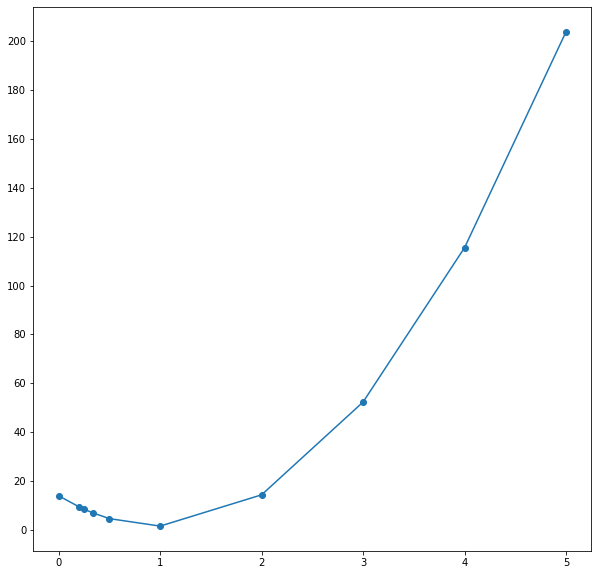

In [235]:
plt.figure(figsize = (10,10))
plt.scatter(y=[13.9, 9.404, 8.4375, 6.966666666666667, 4.55, 1.5, 14.3, 52.3, 115.5, 203.9],
           x=[0,1/5,1/4,1/3,1/2,1,2,3,4,5])
plt.plot([0,1/5,1/4,1/3,1/2,1,2,3,4,5],
        [13.9, 9.404, 8.4375, 6.966666666666667, 4.55, 1.5, 14.3, 52.3, 115.5, 203.9])
plt.yticks([0,20,40,60,80,100,120,140,160,180,200])
plt.show()